# Fitting a 3D hyperplane with pymc3

## or...

# Is there dependency between the mass-metallicity relation and the metallicity gradients of galaxies?

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd

from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
#import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data from 65 galaxies
For which their we know their:
 - Stellar mass `logM`
 - Metallicity (oxygen abundance) at the galaxy centre `logZ0`
 - Metallicity gradient (change as metallicity with increasing distance from galaxy centre) `dlogZ`
 - Redshift ("distance" between us and galaxy)  `redshift`
 

In [4]:
data = pd.read_csv('data.csv', index_col=0)
data

,Name,redshift,radius,inc,logM,logM_var,logSFR,logSFR_var,logZ0,dlogZ,logZ0_var,dlogZ_var,logZ0_dlogZ_var,grad_type
0,HDFS_0003,0.563749,0.663518,16.000000,9.747,0.018906,1.386483,0.071249,0.212220,-0.135916,0.000279,0.000086,-0.000052,negative
1,HDFS_0006,0.422325,0.465900,29.000000,9.397,0.021025,-0.017229,0.086854,-0.204761,0.004002,0.018403,0.000249,-0.000552,flat
2,HDFS_0007,0.463676,0.443204,41.000000,9.492,0.051756,0.192963,0.111771,0.678866,-0.344390,0.000252,0.000342,-0.000170,negative
3,HDFS_0008,0.577241,0.183507,61.000000,9.997,0.017292,1.122131,0.078139,0.366301,-0.070069,0.001353,0.000288,-0.000497,negative
4,HDFS_0009,0.563846,0.247173,61.000000,9.487,0.030625,0.958451,0.082691,0.450771,-0.199193,0.000546,0.000231,-0.000235,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,CDFS_11707029,0.522861,0.080843,47.015891,8.147,0.002756,0.098960,0.121107,-0.486894,0.012546,0.034148,0.006845,-0.013452,flat
61,CDFS_11801006,0.336334,0.282977,53.439970,8.597,0.003906,-0.481246,0.001162,-0.252849,-0.003739,0.008708,0.002341,-0.003780,flat
62,CDFS_11803015,0.213611,0.498733,52.522792,8.647,0.004556,-0.966895,0.005474,-0.176921,0.016527,0.019628,0.016429,-0.015855,flat
63,CDFS_11811046,0.576821,0.953135,32.202453,10.540,0.004900,1.279584,0.213249,0.653090,-0.239508,0.000492,0.000375,-0.000261,negative


Additionally, we have variances for the stellar mass `logZ_var`

Since the central metallicity and metallicity gradient are correlated we have correlated uncertainties, where the covariance matrix is defined
$$ \Sigma = \begin{bmatrix}\texttt{logZ0_var} & \texttt{logZ0_dlogZ_var} \\ \texttt{logZ0_dlogZ_var} & \texttt{dlogZ_var}\end{bmatrix} $$

The uncertainty redshift is small enought to be neglected.

## A quick look at the data

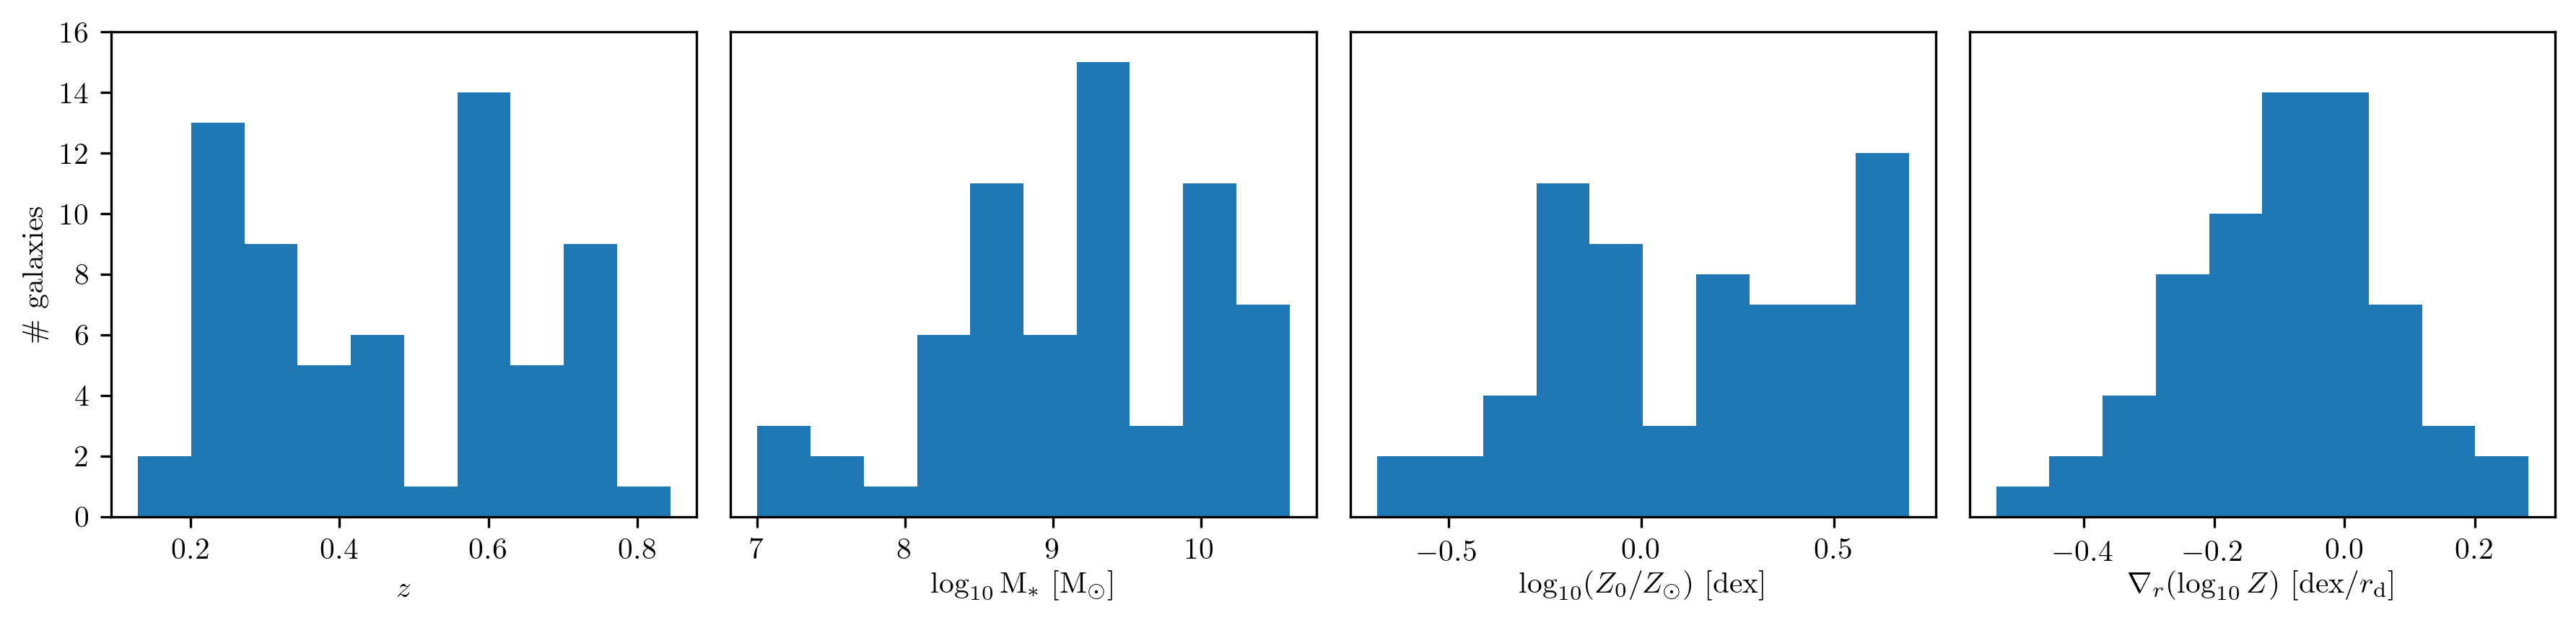

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(12,3), dpi=300, tight_layout=True)

quantities = ['redshift', 'logM', 'logZ0', 'dlogZ']
for ax, quant in zip(axes, quantities):
    ax.hist(data[quant])
    ax.set_ylim(0,16)
    
for ax in axes[1:]:
    ax.tick_params(left=False, labelleft=False)
axes[0].set_ylabel(r'$\textrm{\# galaxies}$')
axes[0].set_xlabel(r'$z$')
axes[1].set_xlabel(r'$\log_{10}{\rm M}_\ast\ [{\rm M}_\odot]$')
axes[2].set_xlabel(r"$\log_{10}(Z_0/Z_\odot)\ [{\rm dex}]$")
axes[3].set_xlabel(r"$\nabla_r(\log_{10}Z)\ [{\rm dex}/r_{\rm d}]$")
plt.show()

## Do we find the mass metallicity relation

From numerous studies, we know that the central metallicity $\left(\log_{10}Z_0\right)$ is correlated with the stellar mass $\left(\log_{10}{\rm M_\ast}\right)$

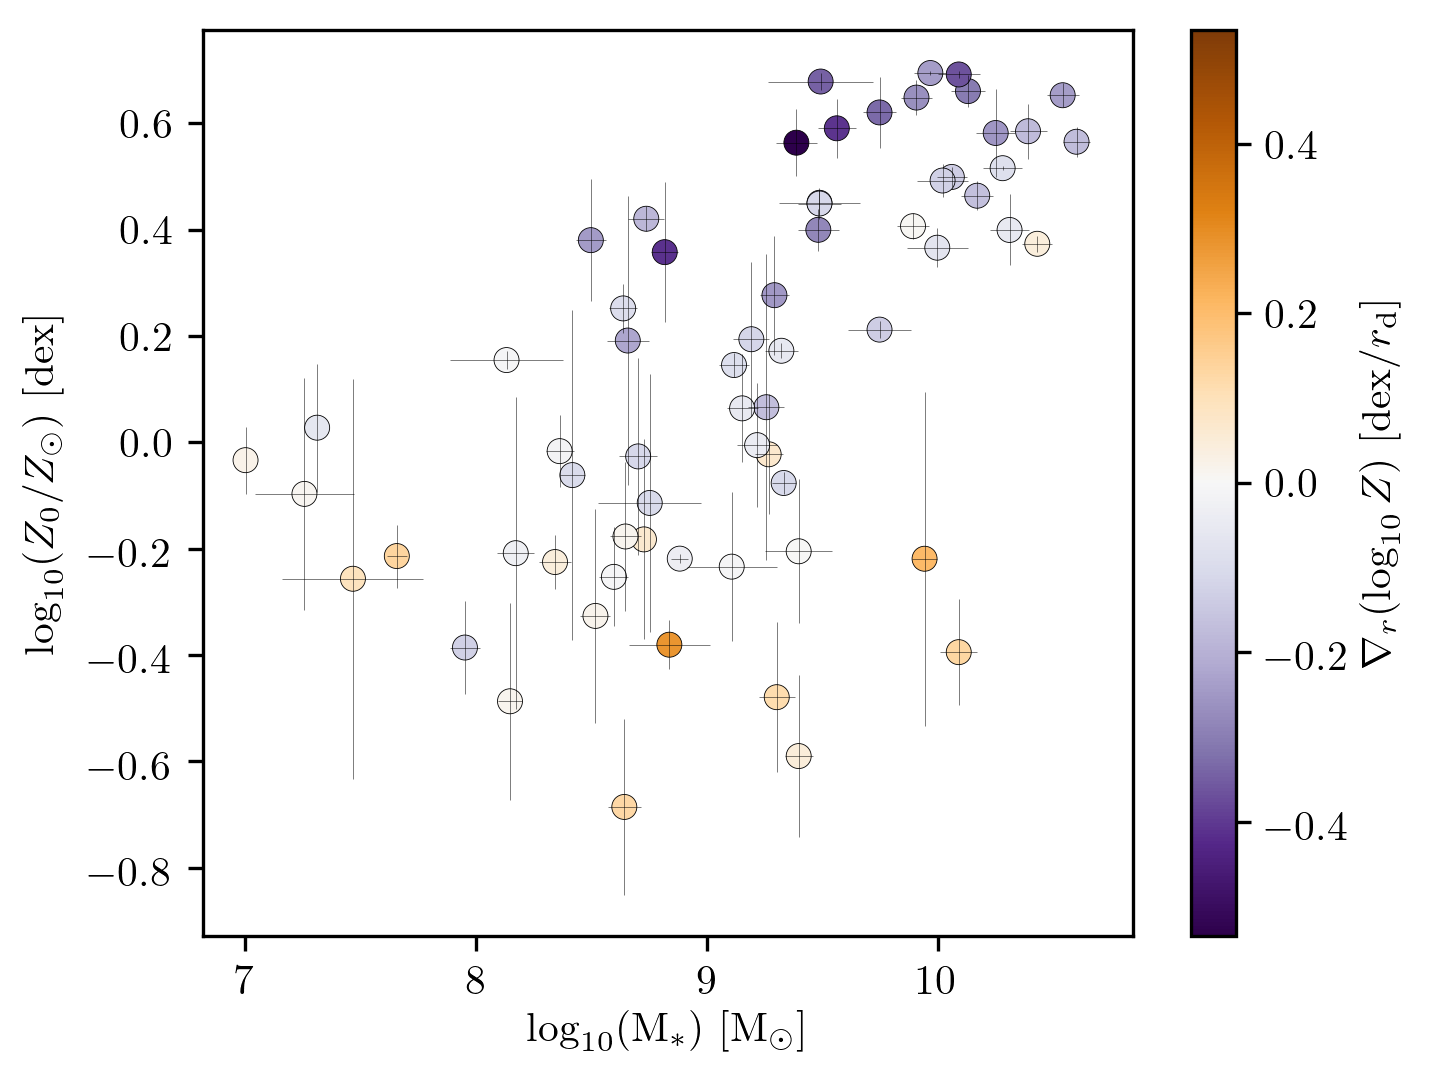

In [31]:
fig, ax = plt.subplots(figsize=(5,4), dpi=300)

#symetric colorbar
vmax = np.max(np.abs(data['dlogZ']))
s = ax.scatter(data['logM'], data['logZ0'], c=data['dlogZ'],
               vmin=-vmax, vmax=vmax, cmap='PuOr_r', ec='k', lw=0.2)
ebar = ax.errorbar(data['logM'], data['logZ0'],
                   xerr=np.sqrt(data['logM_var']), yerr=np.sqrt(data['logZ0_var']),
                   capsize=0, ls='', c='k', lw=0.2, alpha=.6)
cbar = plt.colorbar(s, ax=ax)

ax.set_xlabel(r"$\log_{10}({\rm M}_\ast)\ [{\rm M}_\odot]$")
ax.set_ylabel(r"$\log_{10}(Z_0/Z_\odot)\ [{\rm dex}]$")
cbar.ax.set_ylabel(r"$\nabla_r(\log_{10}Z)\ [{\rm dex}/r_{\rm d}]$")

plt.show()

Indeed, we observe a correlation been $\left(\log_{10}{\rm M_\ast}\right)$ and $\left(\log_{10}Z_0\right)$.
However, this is perhaps weaker than we might have expected from other studies of nearer by galaxies.

We can see that the scatter seems to be partially explained by the metallicity gradient, $\left(\nabla_r(\log_{10}Z)\right)$
At a fixed stellar mass, galaxies with lower central metallicities, have more postive metallicity gradients.

This needs to be explored in more detail.

## The challenge

While we observe that $\log_{10}Z_0$ and $\nabla_r(\log_{10}Z)$ are anti-correlated, these are not independently measured quantities, and their uncertainties are correlated (there are non-zero co-variance terms).

There are several causes for this, but the simplest is that as with a simple straight line fit to the data $y = m x + c$, the error in the intercept $c$ is correlated with the error in the gradient $m$.